In [1]:
path = "tempj.txt"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rc('text', usetex = False)

In [4]:
df = pd.read_csv(path, sep = "\t")

In [5]:
df

,Organism,MYB related,R2R3 MYB,3R MYB,Atypical MYB
0,"Capsicum annuum ""CM334""",138,107,2,1
1,"Capsicum annuum ""Chiltepin""",161,131,3,1
2,"Capsicum annuum ""ECW""",136,121,2,1
3,"Capsicum annuum ""SF""",130,118,2,1
4,"Capsicum annuum ""Zunla-1""",133,110,2,1
5,"Capsicum annuum ""Zunla-1"" refseq",155,108,2,1
6,"Capsicum chinense ""PI159236""",136,111,2,1
7,"Capsicum baccatum ""PBC81""",135,108,2,1
8,"Solanum lycopersicum ""Heinz1706""",127,119,2,0
9,Total,1251,1033,19,8


In [7]:
for idx in sorted_df.index:
    sorted_df.loc[idx, "sum1"] = sorted_df.loc[idx, "MYB related"] + sorted_df.loc[idx, "R2R3 MYB"]
    df.loc[idx, "sum2"] = sorted_df.loc[idx, "sum1"] + sorted_df.loc[idx, "3R MYB"]
    sorted_df.loc[idx, "sum3"] = sorted_df.loc[idx, "sum2"] + sorted_df.loc[idx, "Atypical MYB"]

In [8]:
total_df = sorted_df[sorted_df["Organism"]== "Total"]
sorted_df = sorted_df[sorted_df["Organism"] != "Total"]

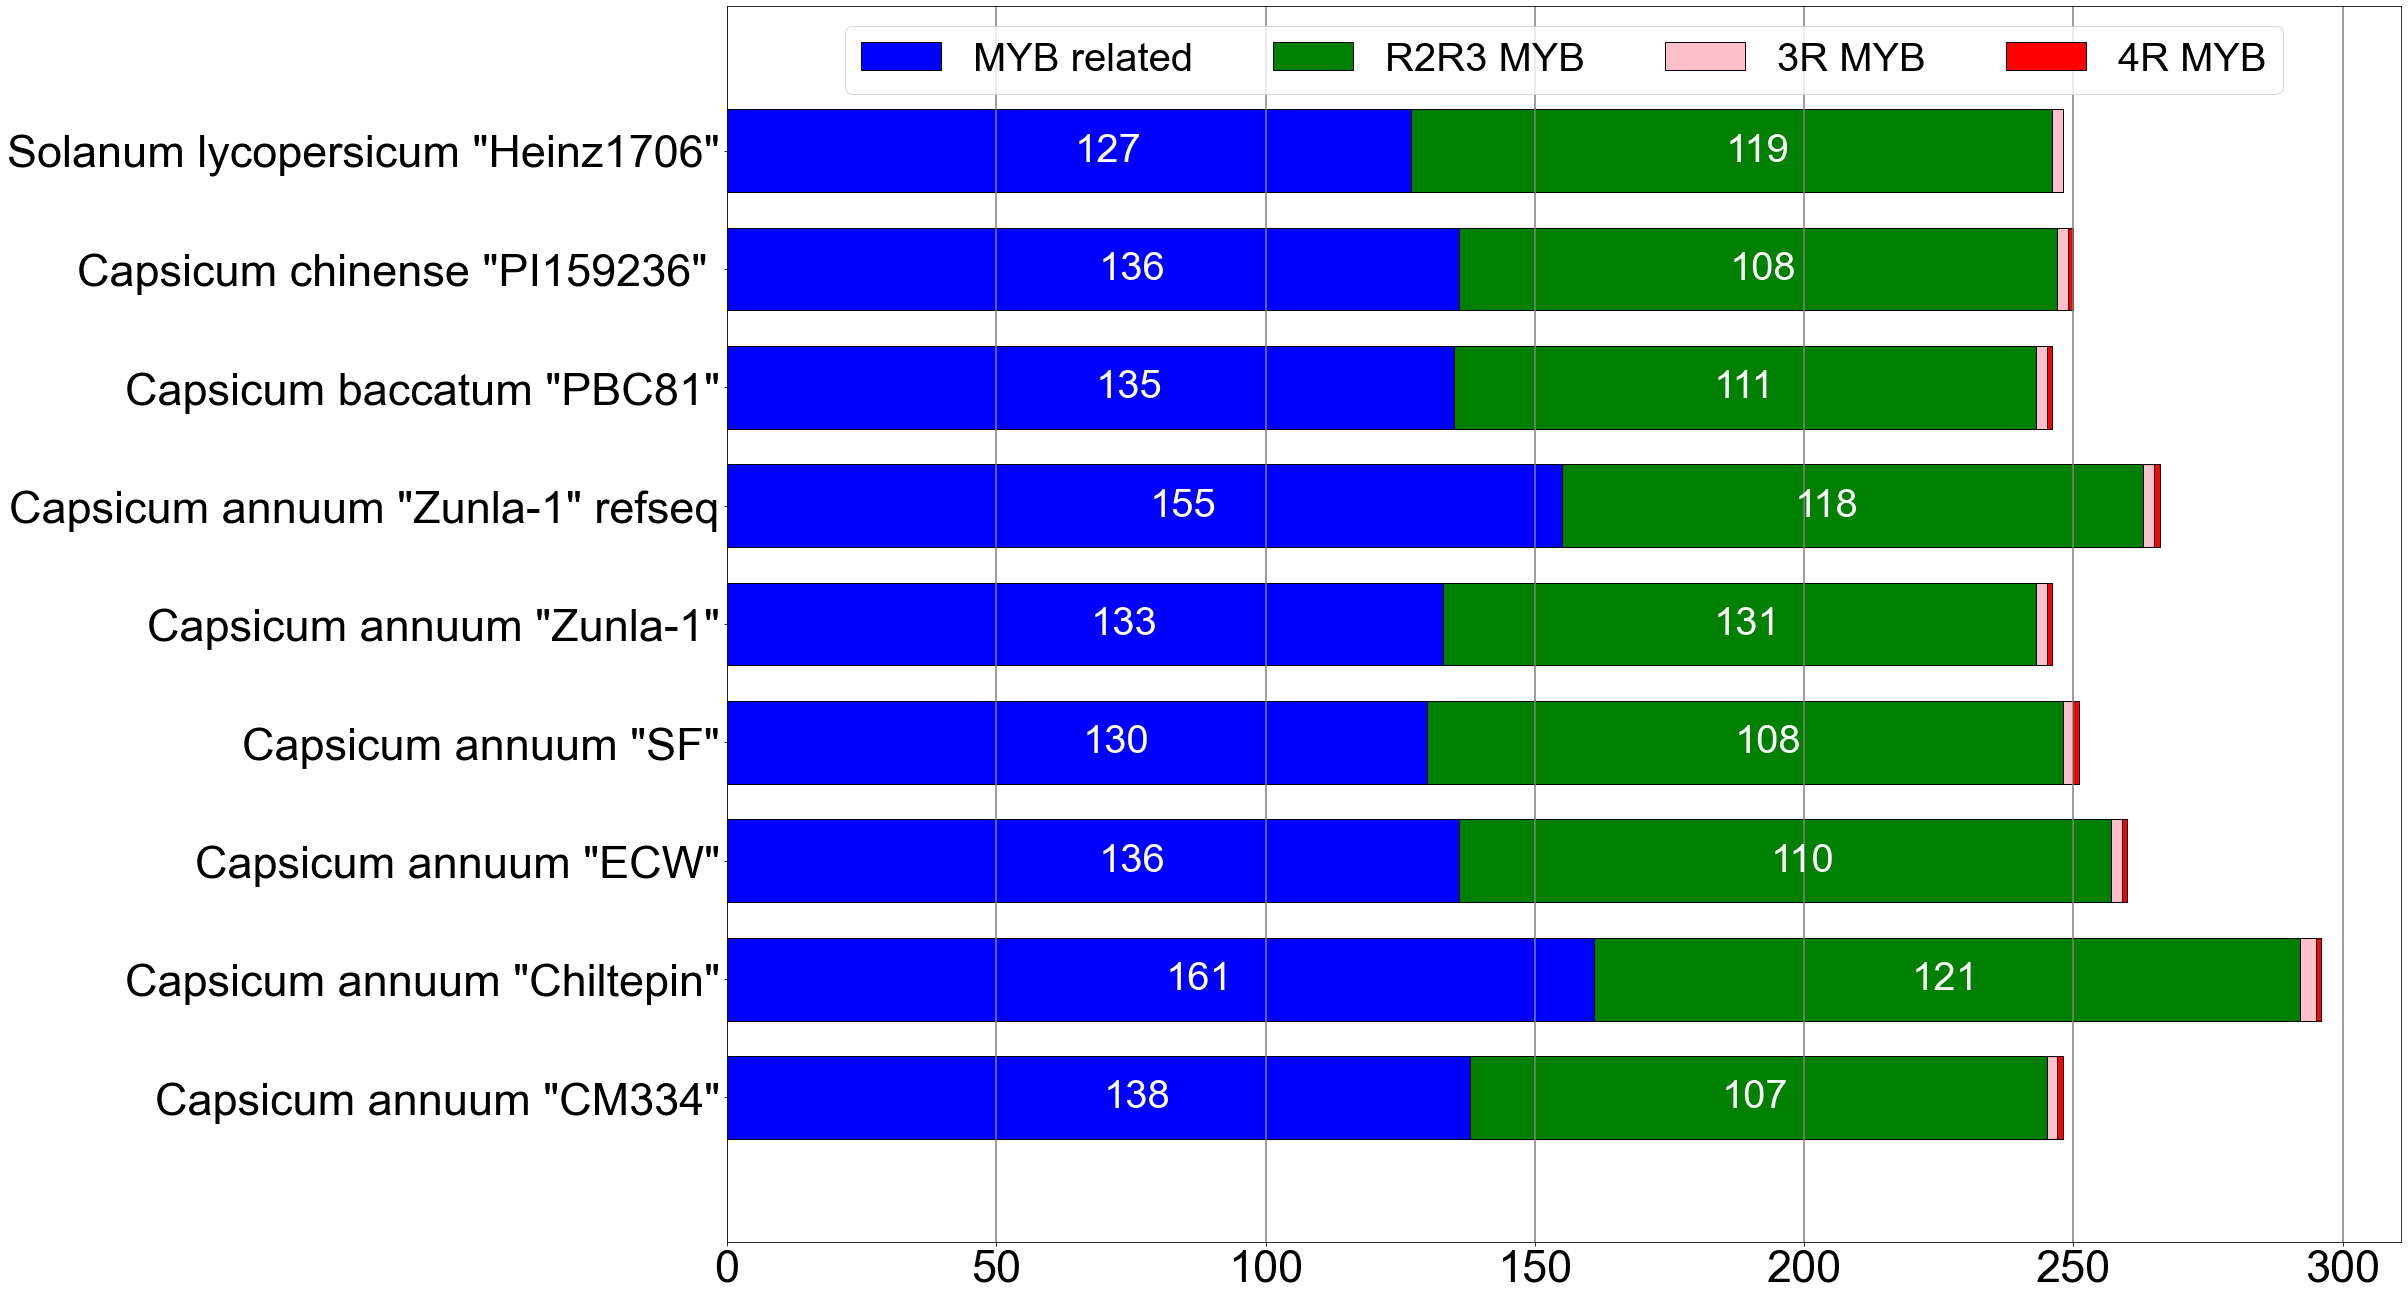

In [46]:
plt.figure(figsize=(30, 50))

ax1 = plt.subplot(2, 1, 1)

p1 = plt.barh(list(sorted_df["Organism"]), list(sorted_df["sum3"]), 
               color = "red", edgecolor = 'black', height=0.7)
p2 = plt.barh(list(sorted_df["Organism"]), list(sorted_df["sum2"]), 
               color = "pink", edgecolor = 'black', height=0.7)
p3 = plt.barh(list(sorted_df["Organism"]), list(sorted_df["sum1"]), 
               color = "green", edgecolor = 'black', height=0.7)
p4 = plt.barh(list(sorted_df["Organism"]), list(sorted_df["MYB related"]), 
               color = "blue", edgecolor = 'black', height=0.7)
plt.yticks(fontsize = 45)
plt.xticks(fontsize = 45, visible = True)
plt.xlabel("Mapping rate (%)", fontsize = 30, verticalalignment = "top", visible = False)
plt.legend((p4[0], p3[0], p2[0], p1[0]), ('MYB related', 'R2R3 MYB', "3R MYB", "4R MYB"), fontsize=40, ncol = 4, loc = 9)

# plt.title(f"root", fontsize = 27)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
plt.gca().margins(y= 0.1)
# plt.axvline(x = 70, color= "red", linewidth = 2, label = "70%")

for x, y in zip(list(sorted_df["MYB related"]), list(sorted_df["Organism"])):
    plt.text(x/2 + 1, y, 
                x, fontsize = 40,  verticalalignment = "center", color = "white")

for i, (x, y) in enumerate(zip(list(sorted_df["sum1"]), list(sorted_df["Organism"]))):
    plt.text(x/4*3 + 1, y, 
                sorted_df.loc[i, "R2R3 MYB"], fontsize = 40,  verticalalignment = "center", color = "white")
    
    
# plt.text(71, 0, "70% cutoff", color = "red", fontsize = 25, verticalalignment = "top")
for i in [0, 50, 100, 150, 200, 250, 300]:
    plt.axvline(i, color = "grey")

plt.savefig(f"MYB_count.png", bbox_inches = "tight")
plt.show()